In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = 'http://bit.ly/w-data'


In [3]:
df=pd.read_csv(data)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Text(0, 0.5, 'Percentage')

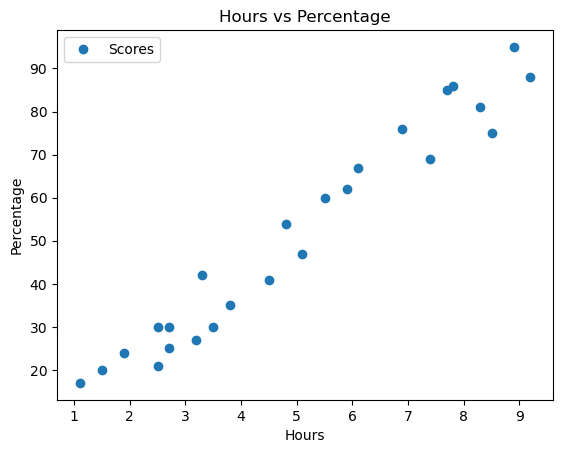

In [4]:
df.plot(style='o',x='Hours',y='Scores')
plt.title('Hours vs Percentage')
plt.xlabel('Hours')  
plt.ylabel('Percentage')  


In [16]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, 1].values

In [17]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.3, random_state=0) 

In [18]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, Y_train)

LinearRegression()

In [19]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_test, Y_test)

LinearRegression()

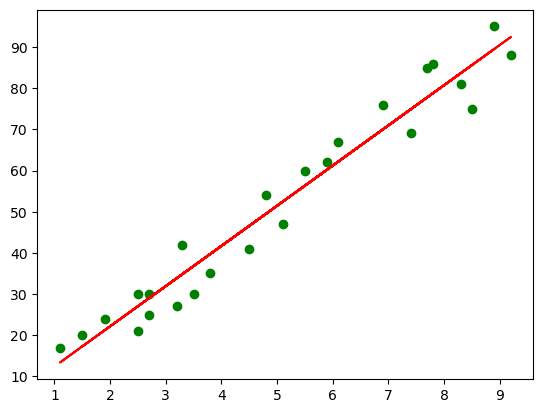

In [20]:
trend = regressor.coef_*X+regressor.intercept_

plt.scatter(X, Y, color='green')
plt.plot(X, trend, color='red')
plt.show()

In [21]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9],
       [3.8],
       [1.9],
       [7.8]])

In [22]:
print(X_test)
prediction = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [23]:
prediction

array([17.27224824, 33.87213115, 74.88360656, 27.03688525, 60.23665105,
       39.73091335, 21.17810304, 78.78946136])

In [24]:
acpr=pd.DataFrame({'ACTUAL':Y_test, 'PREDICTED': prediction})

In [25]:
acpr

,ACTUAL,PREDICTED
0,20,17.272248
1,27,33.872131
2,69,74.883607
3,30,27.036885
4,62,60.236651
5,35,39.730913
6,24,21.178103
7,86,78.789461


In [39]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, prediction)) 

Mean Absolute Error: 4.371662763466041


In [45]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.9481850117096
